In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import random
import os
import glob

%matplotlib inline
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
ds = pd.read_csv("ATP.csv")
#Save Orignal Data

C:\Users\Rahil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,5,6,7,8,9,12,14,15,16,17,18,19,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


 Finding Missing Data

In [3]:
ds.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-580,Australian Chps.,Grass,64,G,19680119,2,109803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-580,Australian Chps.,Grass,64,G,19680119,3,100257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-580,Australian Chps.,Grass,64,G,19680119,4,100105,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-580,Australian Chps.,Grass,64,G,19680119,5,109966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ds.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
163961,2017-M-DC-2017-WG-M-RUS-SRB-01,Davis Cup WG R1: RUS vs SRB,Hard,4,D,20170203,5,106421,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163962,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4,D,20170203,1,106058,NaN,NaN,...,4,4,5,82,52,38,9,13,7,12
163963,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4,D,20170203,2,104545,NaN,NaN,...,9,7,9,113,76,53,17,19,7,11
163964,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4,D,20170203,4,105023,NaN,NaN,...,0,3,2,76,42,30,14,10,8,10
163965,2017-M-DC-2017-WG-M-SUI-USA-01,Davis Cup WG R1: SUI vs USA,Hard,4,D,20170203,5,105449,NaN,NaN,...,4,1,2,54,27,15,15,9,2,6


In [5]:
ds.describe()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,163966,163966,161399,163966,163966,163966,163966,163966,63019.0,13920,...,77401.0,77401.0,77401.0,77401.0,77401.0,77401.0,77401.0,77401.0,77401.0,77401.0
unique,7048,3533,5,28,7,2773,547,3891,68.0,6,...,63.0,98.0,47.0,459.0,316.0,239.0,120.0,82.0,55.0,69.0
top,2016-540,Wimbledon,Hard,32,A,19710901,1,100284,1.0,Q,...,3.0,1.0,2.0,57.0,35.0,24.0,11.0,9.0,3.0,7.0
freq,127,6223,63821,63754,106804,189,6212,1229,8528.0,8880,...,6985.0,8848.0,11203.0,1122.0,1662.0,2159.0,3854.0,9436.0,8541.0,6883.0


*Identifying Placeholder Data*

In [6]:
ds.isnull().sum()

tourney_id                 0
tourney_name               0
surface                 2567
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           100947
winner_entry          150046
winner_name                0
winner_hand               31
winner_ht              17985
winner_ioc                 0
winner_age              3443
winner_rank            24649
winner_rank_points     24649
loser_id                   0
loser_seed            132467
loser_entry           139864
loser_name                 0
loser_hand                51
loser_ht               29248
loser_ioc                  0
loser_age               6559
loser_rank             27797
loser_rank_points      27797
score                    175
best_of                    0
round                      0
minutes                89088
w_ace                  86565
w_df                   86565
w_svpt                 86565
w_1stIn       

Creating seperate month, day and year columns for easy sorting.

In [7]:
ds['tour_day']= ds.tourney_date.astype(str).str[6:]
ds['tour_month']= ds.tourney_date.astype(str).str[5:7]
ds['tour_year']=ds.tourney_date.astype(str).str[:4]

In [8]:
ds.isnull().sum()

tourney_id                 0
tourney_name               0
surface                 2567
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           100947
winner_entry          150046
winner_name                0
winner_hand               31
winner_ht              17985
winner_ioc                 0
winner_age              3443
winner_rank            24649
winner_rank_points     24649
loser_id                   0
loser_seed            132467
loser_entry           139864
loser_name                 0
loser_hand                51
loser_ht               29248
loser_ioc                  0
loser_age               6559
loser_rank             27797
loser_rank_points      27797
score                    175
best_of                    0
round                      0
minutes                89088
w_ace                  86565
w_df                   86565
w_svpt                 86565
w_1stIn       

Converting each column to appropriate data type for further analysis.

In [9]:
ds = ds[ds['tour_year'].between('1968','2017')]
#This is done to chose proper columns

# DATA CLEANING

In [10]:
ds['winner_rank'] = ds['winner_rank'].fillna(0).astype(int)
ds['loser_rank'] = ds['loser_rank'].fillna(0).astype(float)
ds['winner_age'] = ds['winner_age'].dropna().astype(float)
ds['loser_age'] = ds['loser_age'].dropna().astype(float)
ds['winner_ht'] = ds['winner_ht'].dropna().astype(int)
ds['loser_ht'] = ds['loser_ht'].dropna().astype(int)
ds['w_svpt'] = ds['w_svpt'].fillna(0).astype(int)
ds['l_svpt'] = ds['l_svpt'].fillna(0).astype(int)
ds['w_ace'] = ds['w_ace'].fillna(0).astype(int)
ds['l_ace'] = ds['l_ace'].fillna(0).astype(int)
ds['w_df'] = ds['w_df'].fillna(0).astype(int)
ds['l_df'] = ds['l_df'].fillna(0).astype(int)
ds['w_bpSaved'] = ds['w_bpSaved'].fillna(0).astype(int)
ds['l_bpSaved'] = ds['l_bpSaved'].fillna(0).astype(int)
ds['winner_seed'] = ds['winner_seed'].fillna(0).astype(int)
ds['winner_age'] = ds['winner_age'].fillna(ds['winner_age'].mean())
ds['loser_age'] = ds['loser_age'].fillna(ds['loser_age'].mean())
ds['winner_ht'] = ds['winner_ht'].fillna(ds['winner_ht'].mean()).astype(int)
ds['loser_ht'] = ds['loser_ht'].fillna(ds['loser_ht'].mean()).astype(int)
ds.to_csv("csvnew.csv")


In [11]:
ds.describe(include=[np.number])
#We find some variables with low variance : winner_age, loser_age, w_ace, w_df, w_bfsaved, l_ace, l_df, l_bpsaved

#Variables with strange values: winner_seed(it is beacause most of the players are not seeded and they are marked as 0's)

,winner_seed,winner_ht,winner_age,winner_rank,loser_ht,loser_age,loser_rank,w_ace,w_df,w_svpt,w_bpSaved,l_ace,l_df,l_svpt,l_bpSaved
count,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000,163965.000000
mean,2.365261,184.175031,25.540895,67.677651,183.820937,25.589116,99.298064,3.015680,1.294325,36.733949,1.670722,2.222712,1.658647,38.050980,2.271924
std,4.451915,6.201321,3.853259,114.607285,5.985509,3.942474,152.006185,4.811966,2.128374,43.837804,2.760804,3.912211,2.520430,45.057174,3.288981
min,0.000000,160.000000,14.004107,0.000000,160.000000,14.004107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,0.000000,180.000000,22.798084,7.000000,180.000000,22.850103,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,184.000000,25.292266,36.000000,183.000000,25.464750,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,188.000000,27.934292,84.000000,188.000000,28.008214,117.000000,5.000000,2.000000,70.000000,3.000000,3.000000,3.000000,73.000000,4.000000
max,35.000000,208.000000,58.718686,2101.000000,208.000000,63.211499,2159.000000,113.000000,23.000000,491.000000,24.000000,103.000000,26.000000,489.000000,28.000000


Analysis on data before 1993 is difficult because most of the statistic data is NaN. So removing the rows for 1968-1992.

In [12]:
ds.isnull().sum()
#Checking that the NAN's are eliminated.

tourney_id                 0
tourney_name               0
surface                 2567
draw_size                  0
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed                0
winner_entry          150046
winner_name                0
winner_hand               31
winner_ht                  0
winner_ioc                 0
winner_age                 0
winner_rank                0
winner_rank_points     24649
loser_id                   0
loser_seed            132467
loser_entry           139864
loser_name                 0
loser_hand                51
loser_ht                   0
loser_ioc                  0
loser_age                  0
loser_rank                 0
loser_rank_points      27797
score                    175
best_of                    0
round                      0
minutes                89088
w_ace                      0
w_df                       0
w_svpt                     0
w_1stIn       

In [13]:
ds.dtypes
#The plot doesnt have any typos or errors, since the columns have their correct data types

tourney_id             object
tourney_name           object
surface                object
draw_size              object
tourney_level          object
tourney_date           object
match_num              object
winner_id              object
winner_seed             int32
winner_entry           object
winner_name            object
winner_hand            object
winner_ht               int32
winner_ioc             object
winner_age            float64
winner_rank             int32
winner_rank_points     object
loser_id               object
loser_seed             object
loser_entry            object
loser_name             object
loser_hand             object
loser_ht                int32
loser_ioc              object
loser_age             float64
loser_rank            float64
loser_rank_points      object
score                  object
best_of                object
round                  object
minutes                object
w_ace                   int32
w_df                    int32
w_svpt    

In [14]:
ds_new=ds[ds['tour_year'].between('1993','2017')]
#Since most of the data from 1968 to 1992 is not recorded, we exclude it to make proper statistical analysis.

In [15]:
ds['winner_ioc'].value_counts()
#We find the number of wins for a country from the database.

USA    35047
ESP    13825
AUS    12248
FRA    10313
SWE     8139
GER     7977
ARG     7324
CZE     5461
ITA     4437
RUS     4274
GBR     3949
RSA     3391
SUI     3175
CRO     3109
NED     2998
CHI     2449
AUT     2388
BRA     2151
ROU     1896
BEL     1639
SRB     1538
NZL     1477
SVK     1411
IND     1319
CAN     1169
ECU     1116
MEX     1091
JPN     1050
ISR      956
POL      932
       ...  
BAR       21
MKD       19
HAI       16
SIN       11
SOL       11
SYR       10
BAN       10
MAD        7
JOR        7
KSA        7
ZAM        6
CMR        6
BRN        6
ECA        5
QAT        4
TOG        4
MHL        4
OMA        3
SAM        3
AND        3
BEN        2
NIG        2
CAR        2
IRQ        2
MLT        2
MNE        1
TJK        1
GUM        1
UAE        1
RHO        1
Name: winner_ioc, Length: 126, dtype: int64

             winner_seed  winner_ht  winner_age  winner_rank  loser_ht  \
winner_seed     1.000000   0.061418    0.020506    -0.186829  0.019795   
winner_ht       0.061418   1.000000   -0.016294    -0.018983  0.055080   
winner_age      0.020506  -0.016294    1.000000    -0.109534  0.022761   
winner_rank    -0.186829  -0.018983   -0.109534     1.000000 -0.015607   
loser_ht        0.019795   0.055080    0.022761    -0.015607  1.000000   
loser_age       0.010569   0.016996    0.080827    -0.067922  0.004045   
loser_rank     -0.017924  -0.006787   -0.051364     0.306753 -0.028393   
w_ace           0.157024   0.327000    0.039003    -0.049219  0.115007   
w_df            0.105566   0.160242    0.011702    -0.009829  0.100149   
w_svpt          0.150920   0.164489    0.026435    -0.035705  0.152356   
w_bpSaved       0.092712   0.077059    0.012580    -0.011515  0.081153   
l_ace           0.103111   0.126737    0.049333    -0.031917  0.297225   
l_df            0.107740   0.113768   

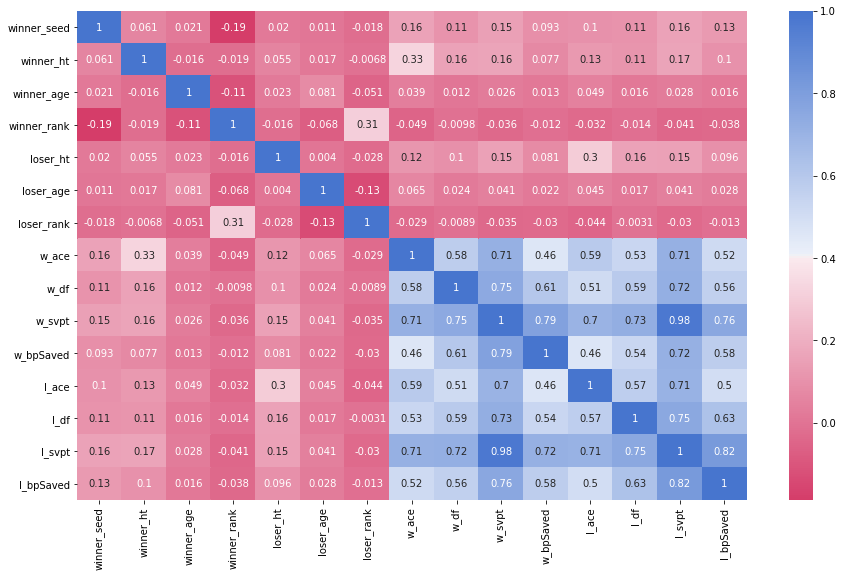

In [20]:
cmap = sns.diverging_palette(0, 256, sep=1, n=256, as_cmap=True)

correlations = ds.corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap,annot=True)

#Finding correlation between varibles used
#They are not closely related so they are used, seperately.

# Exploratory Data Analysis

**Histogram Plots**

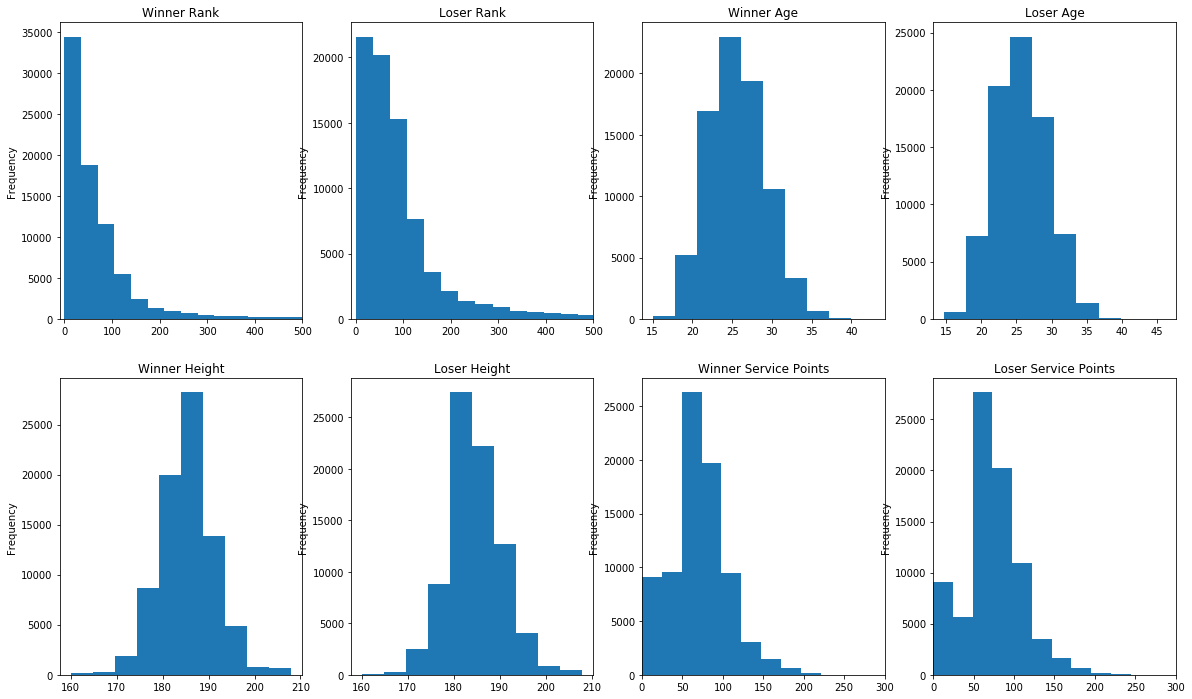

In [17]:
plt.figure(1, figsize=(20,12))
plt.subplot(2,4,1)
ds_new['winner_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Winner Rank')

plt.subplot(2,4,2)
ds_new['loser_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Loser Rank')

plt.subplot(2,4,3)
ds_new['winner_age'].plot(kind='hist', title='Winner Age')

plt.subplot(2,4,4)
ds_new['loser_age'].plot(kind='hist', title='Loser Age')

plt.subplot(2,4,5)
ds_new['winner_ht'].plot(kind='hist', title='Winner Height')

plt.subplot(2,4,6)
ds_new['loser_ht'].plot(kind='hist', title='Loser Height')

plt.subplot(2,4,7)
ds_new['w_svpt'].plot(kind='hist', title='Winner Service Points', xlim=(0,300), bins=20)

plt.subplot(2,4,8)
ds_new['l_svpt'].plot(kind='hist', title='Loser Service Points', xlim=(0,300), bins=20)

    We find from the graphs that the winners and losers accoroding to ranks have dog food distribution
    We also find the age of the winners and losers have an edge peak distribution

Density Plots

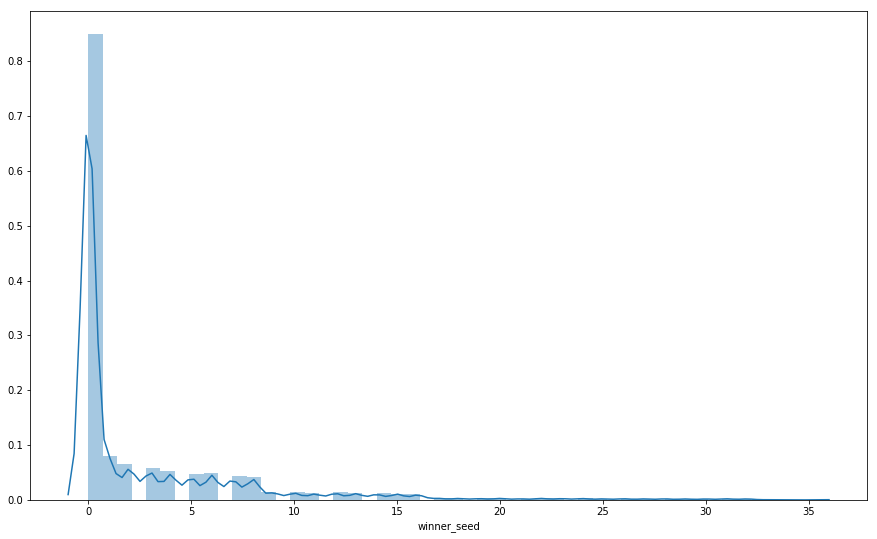

In [18]:
sns.distplot(ds_new['winner_seed'])

We can see that the maximum amount of time the winner is seed 1 and it decreases sharply. It is a dog food distribution.

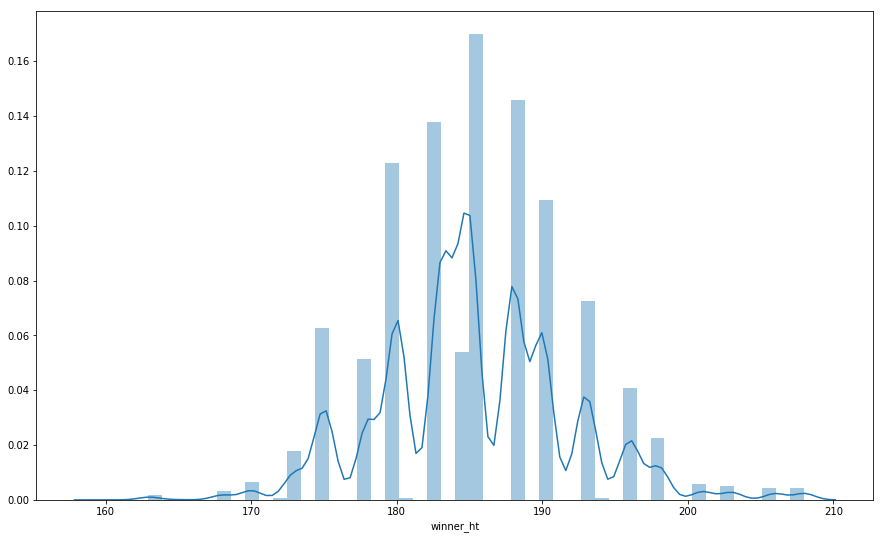

In [19]:
sns.distplot(ds_new['winner_ht'])

The data shows edge peak distribution where the mean is around 184 and the end points are 160's and 200's.

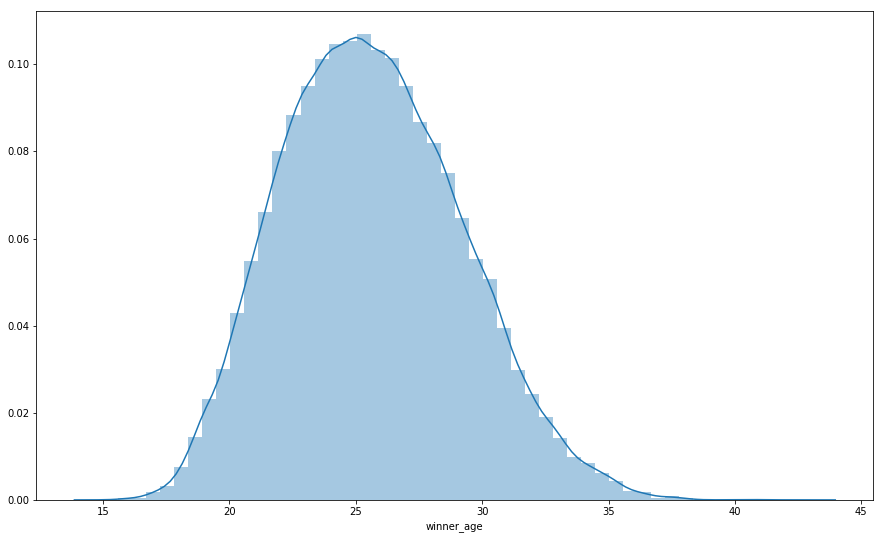

In [20]:
sns.distplot(ds_new['winner_age'])

The age plot shows that the maximum people winning the games are in the age of 20 to 30 with a normal distribution.

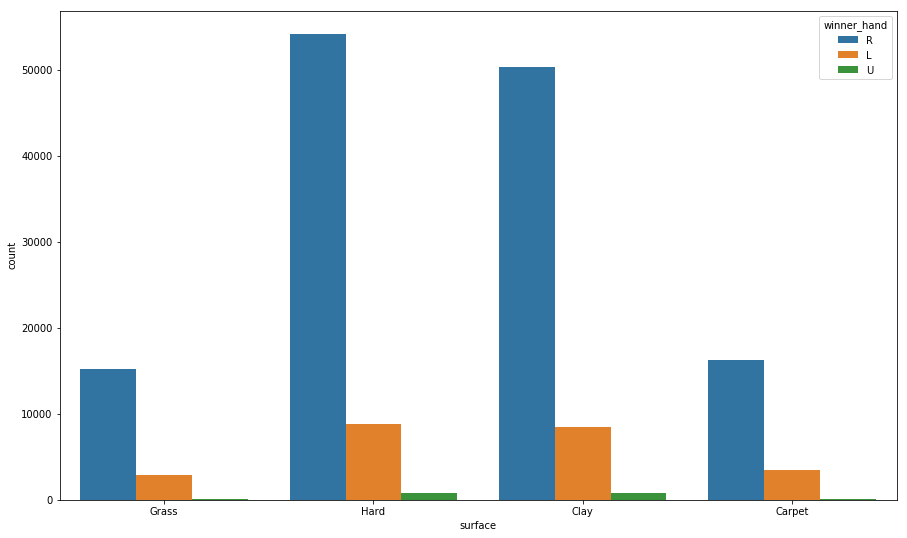

In [21]:
sns.countplot(x="surface",hue="winner_hand",data=ds)

We can see that Right handed people dominate over other hand orientations mostly because being right handed is common.

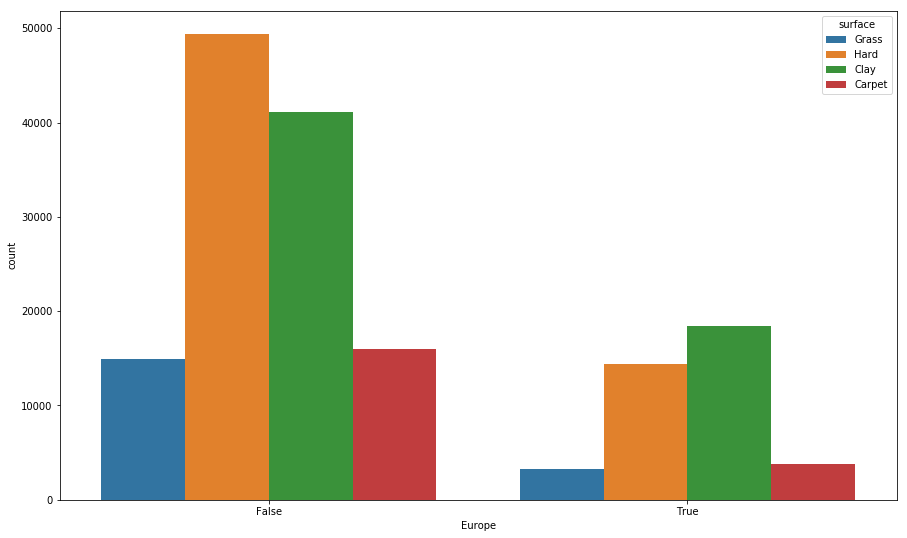

In [22]:
ds['Europe']= ds['winner_ioc'].isin(["ESP","FRA","SWE","GER"])
ds['America']=ds['winner_ioc'].isin(["USA","ARG"])
sns.countplot(x="Europe",hue="surface",data=ds)
#This plots shows how many times has european countries won against the rest.

Distribution of aces according to surface type in Grand Slams

In [23]:
ds_ace = ds[ds['tourney_level'].astype(str).isin(['G'])]

[Text(0,0.5,'Aces'), Text(0.5,0,'Surface')]

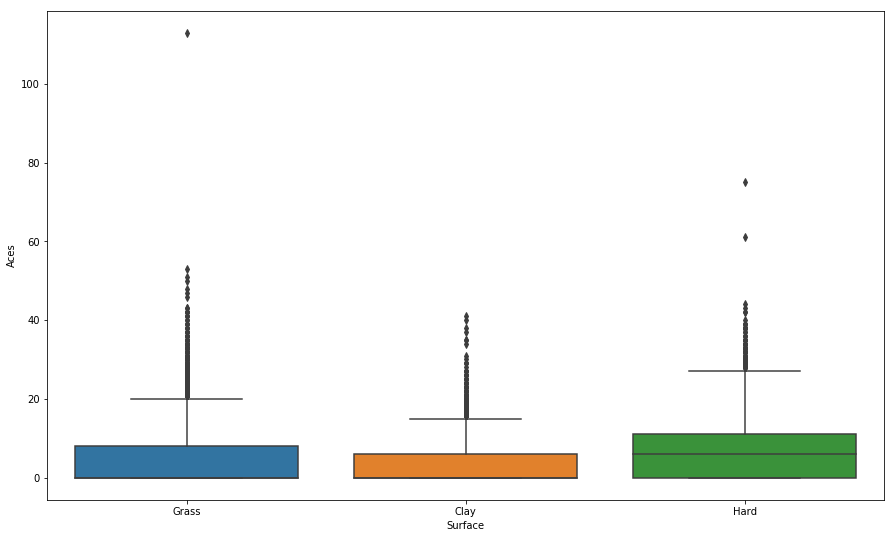

In [24]:
g = sns.boxplot(x="surface", y="w_ace", data=ds_ace)
g.set(xlabel='Surface', ylabel='Aces')
#Also this dataset doesnt have any outliers.

From the plot we can understand that hard court has the highest occurance of aces.

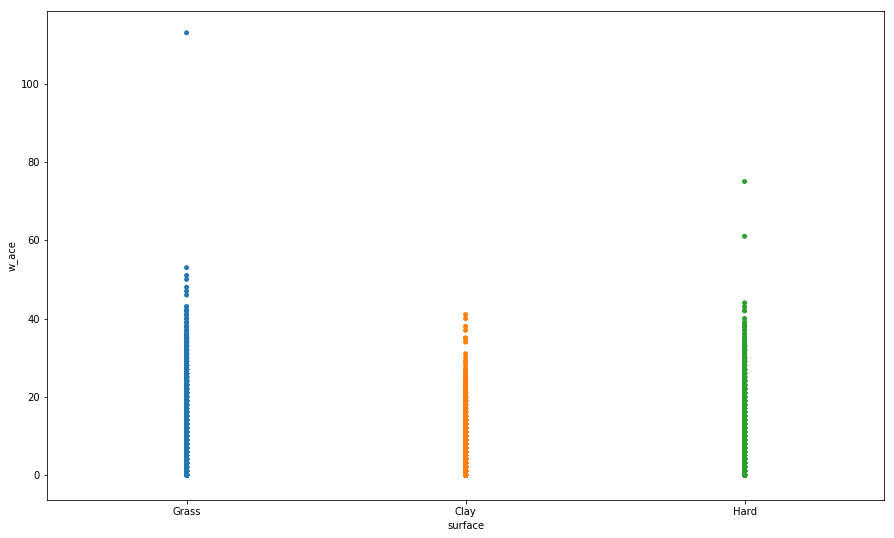

In [25]:
sns.stripplot(x="surface", y="w_ace", data=ds_ace)

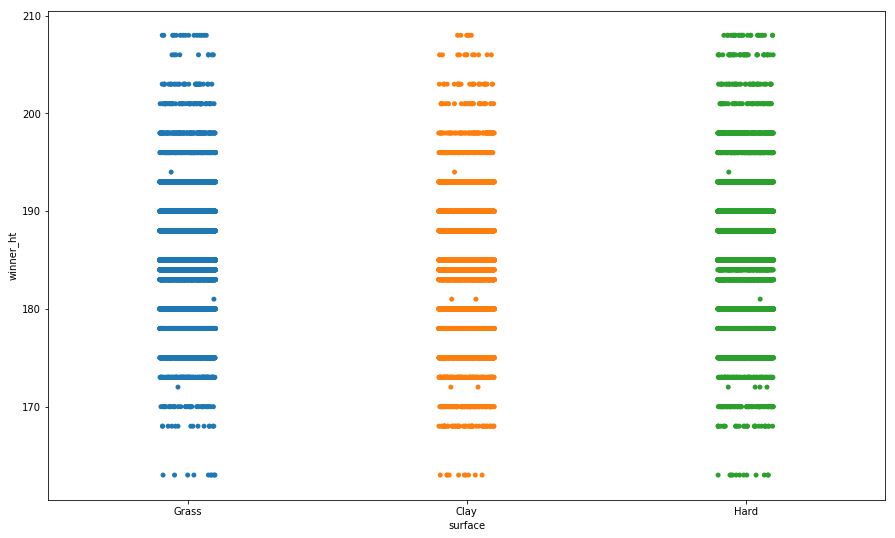

In [26]:
sns.stripplot(x="surface", y="winner_ht", data=ds_ace, jitter=True)

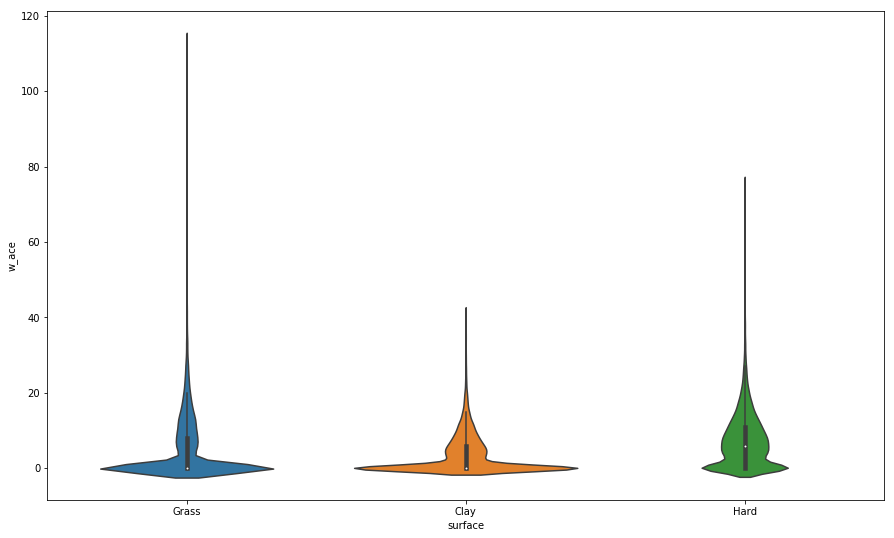

In [27]:
sns.violinplot(x="surface", y="w_ace", data=ds_ace)
#This show the concentration of the number of aces on different surfaces.

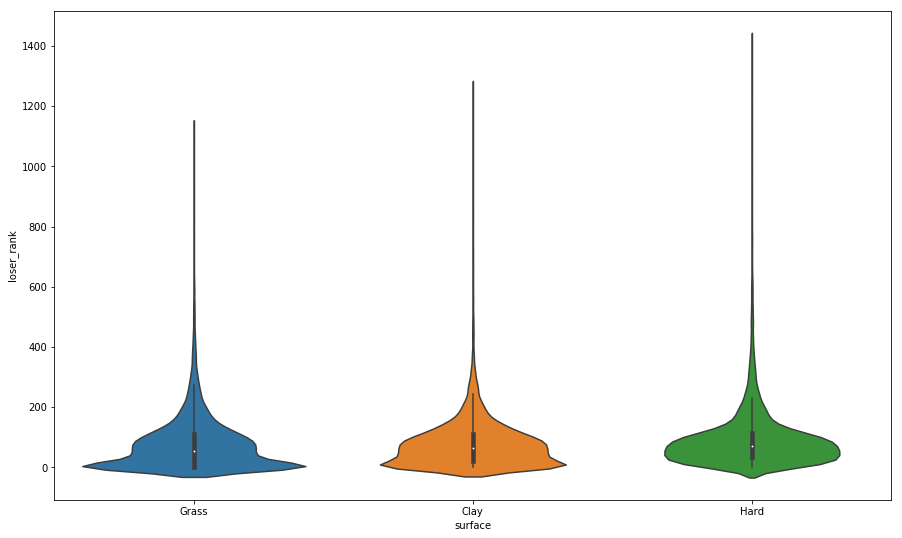

In [28]:
sns.violinplot(x="surface", y="loser_rank", data=ds_ace)
#This plots shows the distribution of loses according to rank on different surfaces.
#Most of the loses are between 0 to 200th rank.

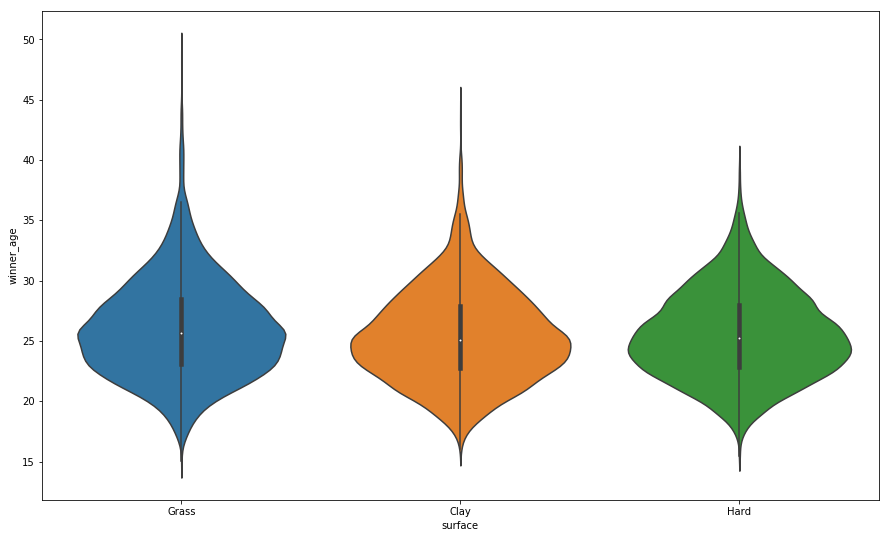

In [29]:
sns.violinplot(x="surface", y="winner_age", data=ds_ace)

Relations between the ranks and getting into the finals of Grand Slam

([<matplotlib.axis.XTick at 0x11f2f505908>,
 <a list of 5 Text xticklabel objects>)

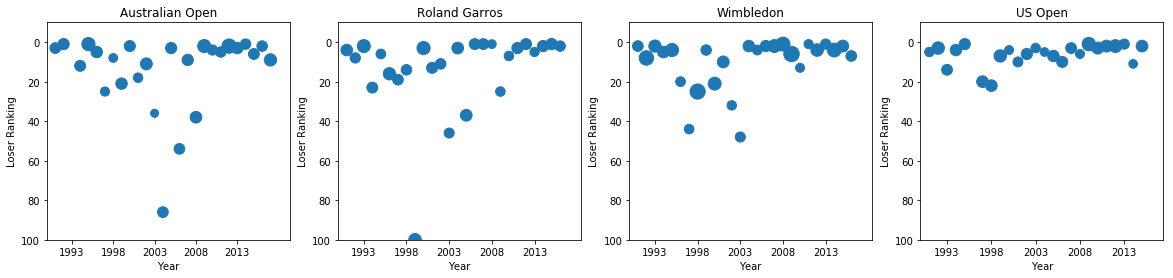

In [30]:
ds_gsf_1 = ds[~np.isnan(ds['loser_rank']) & (ds['tourney_name'] == 'Australian Open') & (ds['round']=='F')]

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Australian Open")
plt.scatter(ds_gsf_1['tour_year'],ds_gsf_1['loser_rank'], s=ds_gsf_1['l_svpt'])
plt.xlim(1990,)
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(np.arange(1993, 2017, 5), np.arange(1993, 2017, 5))

ds_gsf_2 = ds[~np.isnan(ds['loser_rank']) & (ds['tourney_name'] == 'Roland Garros') & (ds['round']=='F')].copy()

plt.subplot(1,4,2)
plt.title("Roland Garros")
plt.scatter(ds_gsf_2['tour_year'],ds_gsf_2['loser_rank'], s=ds_gsf_2['l_svpt'])
plt.xlim(1990,)
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(np.arange(1993, 2017, 5), np.arange(1993, 2017, 5))

ds_gsf_3 = ds[~np.isnan(ds['loser_rank']) & (ds['tourney_name'] == 'Wimbledon') & (ds['round']=='F')].copy()

plt.subplot(1,4,3)
plt.title("Wimbledon")
plt.scatter(ds_gsf_3['tour_year'],ds_gsf_3['loser_rank'], s=ds_gsf_3['l_svpt'])
plt.xlim(1990,)
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(np.arange(1993, 2017, 5), np.arange(1993, 2017, 5))

ds_gsf_4 = ds[~np.isnan(ds['loser_rank']) & (ds['tourney_name'] == 'US Open') & (ds['round']=='F')].copy()

plt.subplot(1,4,4)
plt.title("US Open")
plt.scatter(ds_gsf_4['tour_year'],ds_gsf_4['loser_rank'], s=ds_gsf_4['l_svpt'])
plt.xlim(1990,)
plt.ylim(-10,100)
plt.gca().invert_yaxis()
plt.xlabel('Year')
plt.ylabel('Loser Ranking')
plt.xticks(np.arange(1993, 2017, 5), np.arange(1993, 2017, 5))

The scatterplots are generated with the loser ranking for each Grand Slam and the size of the bubble determines the number of service points won by the loser.

Top Aces, Double Faults and Break points saved

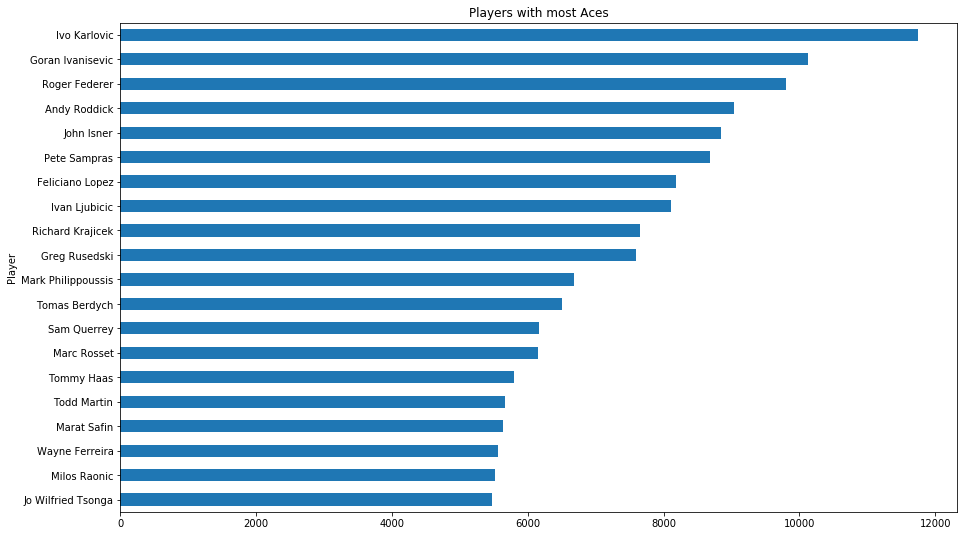

In [31]:
sw = ds.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
sl = ds.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['aces'] = r['l_ace']+r['w_ace']
final = r.groupby('index').agg({'aces':'sum'}).sort_values('aces',ascending=False).head(20)
final = final.reset_index()
final.columns = ['Player','Aces']
final = final.sort_values('Aces',ascending=True)
final.plot('Player','Aces', kind='barh', title='Players with most Aces', legend=False)

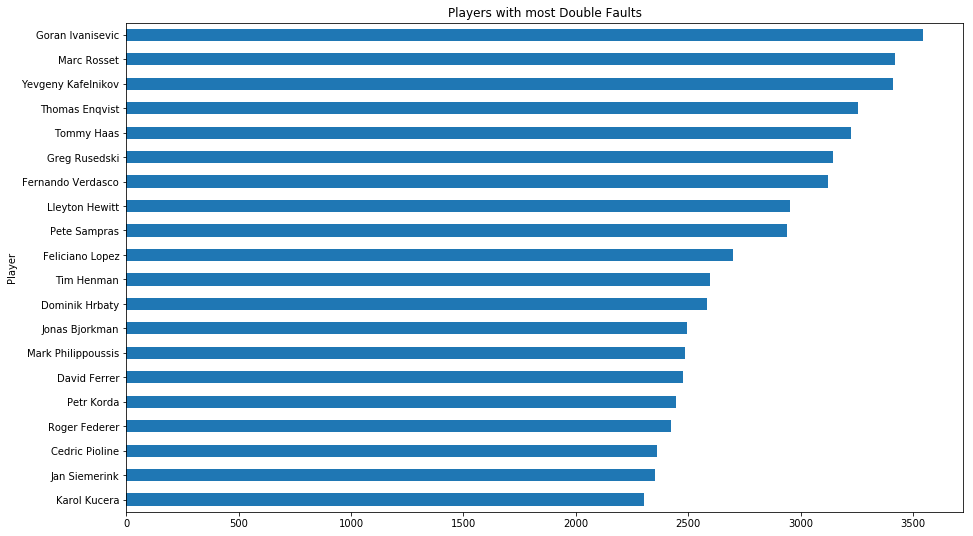

In [32]:
sw = ds.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
sl = ds.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_df']+r['w_df']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(20)
final = final.reset_index()
final.columns = ['Player','DoubleFaults']
final = final.sort_values('DoubleFaults',ascending=True)
final.plot('Player','DoubleFaults', kind='barh', title='Players with most Double Faults', legend=False)

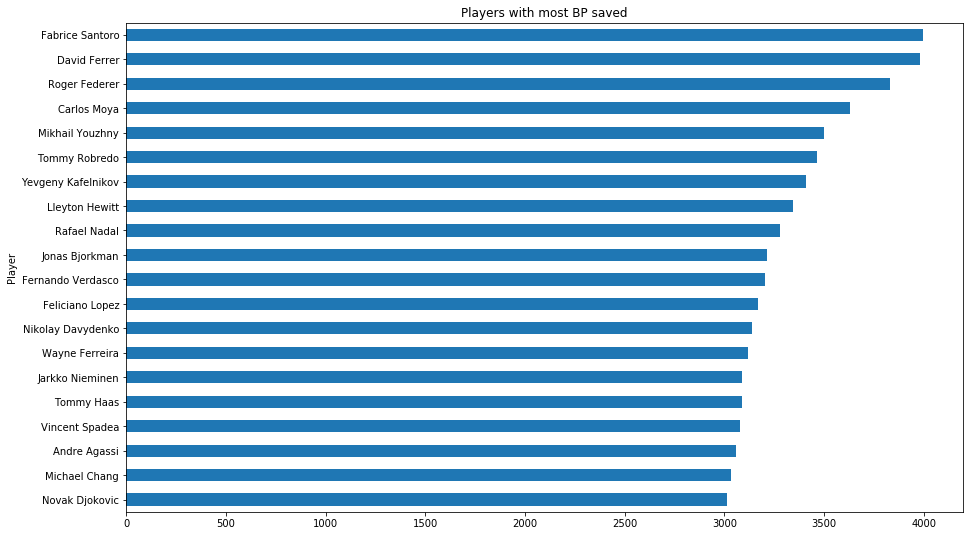

In [33]:
sw = ds.groupby(['winner_name']).agg({'w_bpSaved':'sum'}).fillna(0).sort_values(['w_bpSaved'], ascending=False)
sl = ds.groupby(['loser_name']).agg({'l_bpSaved':'sum'}).fillna(0).sort_values(['l_bpSaved'], ascending=False)
dfs = [sw,sl]
r = pd.concat(dfs).reset_index().fillna(0)
r['dfs'] = r['l_bpSaved']+r['w_bpSaved']
final = r.groupby('index').agg({'dfs':'sum'}).sort_values('dfs',ascending=False).head(20)
final = final.reset_index()
final.columns = ['Player','BreakPointsSaved']
final = final.sort_values('BreakPointsSaved',ascending=True)
final.plot('Player','BreakPointsSaved', kind='barh', title='Players with most BP saved', legend=False)

TOP Players in the last 10 years

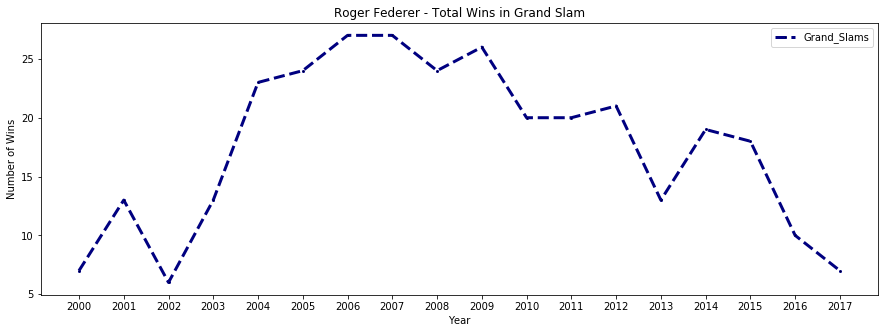

In [34]:
pldf_1 = ds[(ds['winner_name'] == 'Roger Federer')].groupby(['tour_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Roger Federer - Total Wins in Grand Slam')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tour_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)


plt.legend(['Grand_Slams'], loc='upper right', prop={'size': 10})

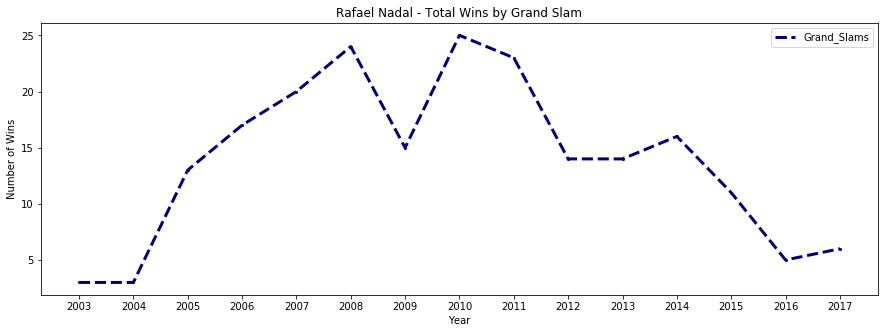

In [35]:
pldf_1 = ds[(ds['winner_name'] == 'Rafael Nadal')].groupby(['tour_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Rafael Nadal - Total Wins by Grand Slam')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tour_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)
plt.legend(['Grand_Slams'], loc='upper right')

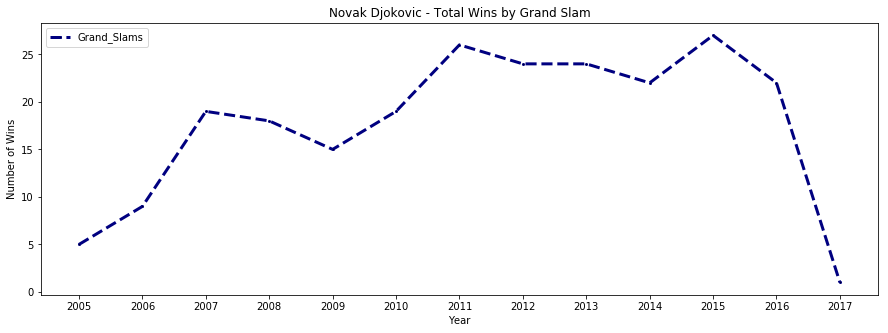

In [36]:
pldf_1 = ds[(ds['winner_name'] == 'Novak Djokovic')].groupby(['tour_year','tourney_level'], as_index=False).agg(['count'])
pldf_2 = pldf_1['tourney_id'].reset_index()

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 5))))

plt.title('Novak Djokovic - Total Wins by Grand Slam')
plt.ylabel('Number of Wins')
plt.xlabel('Year')
plt.plot(pldf_2[pldf_2['tourney_level']=='G']['tour_year'], pldf_2[pldf_2['tourney_level']=='G']['count'], linestyle='dashed', marker='o', markerfacecolor='black', markersize=2, linewidth=3)
plt.legend(['Grand_Slams'], loc='upper left')

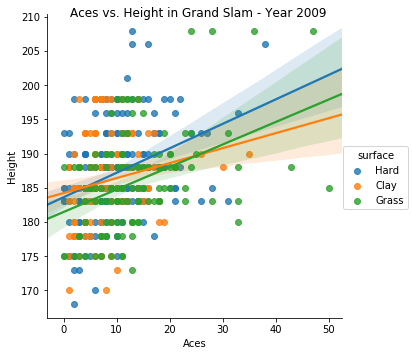

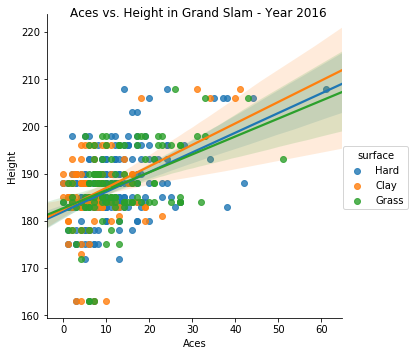

In [37]:
g1 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=ds[(ds['tourney_level'].isin(['G']))&(ds['tour_year']=='2009')])
g1.fig.suptitle('Aces vs. Height in Grand Slam - Year 2009') 
g1.set(xlabel='Aces', ylabel='Height')

g2 = sns.lmplot(x='w_ace', y='winner_ht', hue='surface', fit_reg=True, data=ds[(ds['tourney_level'].isin(['G']))&(ds['tour_year']=='2016')])
g2.fig.suptitle('Aces vs. Height in Grand Slam - Year 2016')
g2.set(xlabel='Aces', ylabel='Height')

We notice that in recent years there is a higher relation of aces to the height of the players The number of taller players with more aces have also increased